# Obesity Levels 

### Our Motivation 
The "Obesity Levels" dataset has captured our interest because obesity is a major public health issue with significant consequences. By examining this dataset, we hope to uncover the key factors contributing to obesity and leverage machine learning models to enhance our ability to classify and predict obesity levels. Understanding these factors will empower individuals and healthcare professionals to create more effective prevention strategies, ultimately reducing obesity rates and improving public health outcomes. 

### Our Goal 
Our goal is to create a machine-learning model that predicts individual obesity levels using both classification and clustering techniques. The classification approach will enable us to train the model to differentiate between individuals with different obesity levels based on a variety of health, dietary, and lifestyle factors. Clustering, on the other hand, will help identify hidden patterns in the dataset by grouping individuals with similar obesity risk profiles. These clusters will then assist in predicting obesity levels for new individuals by analyzing their resemblance to existing groups.

##### source of dataset : https://www.kaggle.com/datasets/fatemehmehrparvar/obesity-levels

In [1]:
import pandas as pd
df = pd.read_csv('Dataset/ObesityDataSet_raw_and_data_sinthetic.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

#### General Information About The Dataset
- Dataset include 17 attributes and 2111 records.
- There is 8 attributes of type float and the other 9 of type object. 
- Class label : NObeyesdad ( type of obesity ).
- There are no missing values.

#### Clarifying Attributes' Shortcuts
- FAVC : Feature, Binary, " Do you eat high caloric food frequently? "
- FCVC : Feature, Integer, " Do you usually eat vegetables in your meals? "
- NCP : Feature, Continuous, " How many main meals do you have daily? "
-  CAEC : Feature, Categorical, " Do you eat any food between meals? "
-  CH2O: Feature, Continuous, " How much water do you drink daily? "
-  SCC: Feature, Binary, " Do you monitor the calories you eat daily? "
-  FAF: Feature, Continuous, " How often do you have physical activity? "
-  TUE : Feature, Integer, " How much time do you use technological devices such as cell phone, videogames, television, computer and others? "
-  CALC : Feature, Categorical, " How often do you drink alcohol? "
-  MTRANS : Feature, Categorical, " Which transportation do you usually use? "
-  NObeyesdad : Target, Categorical, "Obesity level"


Text(0.5, 1.0, 'Correlation heatmap')

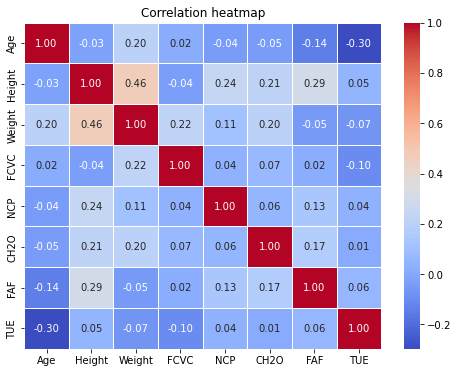

In [3]:
import seaborn as sns 
import matplotlib.pyplot as plt
correlation_matrix = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True , cmap='coolwarm',fmt=".2f",linewidths=.5)
plt.title('Correlation heatmap')

Text(0.5, 1.0, 'Correlation heatmap')

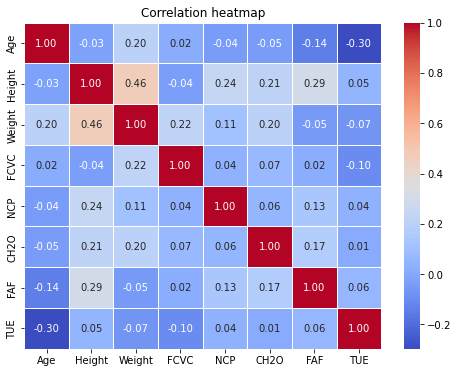

In [61]:
import seaborn as sns 
import matplotlib.pyplot as plt
selected_columns = df [['Age' , 'Height' , 'Weight' , 'FCVC' , 'NCP' , 'CH2O' , 'FAF' , 'TUE']]
correlation_matrix = selected_columns.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True , cmap='coolwarm',fmt=".2f",linewidths=.5)
plt.title('Correlation heatmap')

In [62]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


<function matplotlib.pyplot.show(close=None, block=None)>

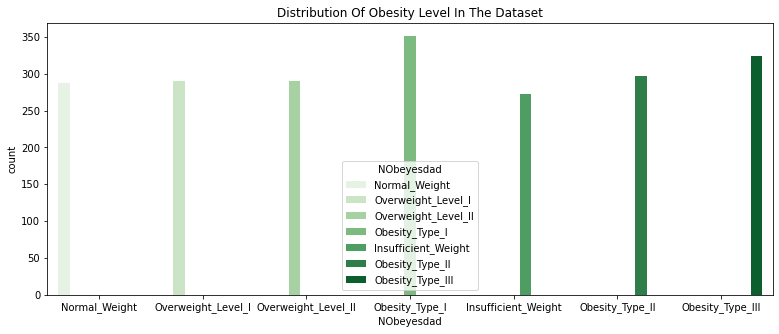

In [63]:
plt.figure(figsize =(13,5) )
sns.countplot(x='NObeyesdad' , data = df ,hue ='NObeyesdad',palette ='Greens')
plt.title('Distribution Of Obesity Level In The Dataset')
plt.show

In [64]:
data = df.Age

Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)

IQR = Q3 - Q1
print ( Q1 ,Q3)

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
pd.reset_option('display.max_rows')
print("Outliers:")
print(outliers)


19.947192 26.0
Outliers:
            Age  Gender    Height      Weight        CALC FAVC      FCVC  \
13    41.000000    Male  1.800000   99.000000  Frequently  yes  2.000000   
21    52.000000  Female  1.690000   87.000000          no  yes  3.000000   
33    39.000000    Male  1.790000   90.000000   Sometimes   no  2.000000   
92    55.000000    Male  1.780000   84.000000  Frequently   no  3.000000   
104   38.000000  Female  1.560000   80.000000   Sometimes  yes  2.000000   
...         ...     ...       ...         ...         ...  ...       ...   
1740  37.765356    Male  1.763582  117.861590   Sometimes  yes  2.145114   
1775  37.207082    Male  1.762921  118.401740   Sometimes  yes  2.136830   
1776  38.108940    Male  1.752863  119.201465   Sometimes  yes  2.499388   
1777  38.644441    Male  1.768235  117.792268   Sometimes  yes  2.230742   
1778  38.112989    Male  1.766888  118.134898   Sometimes  yes  2.240757   

           NCP  SCC SMOKE      CH2O family_history_with_overwe

min out 10.75
max out 35.15